<a href="https://colab.research.google.com/github/eduvaladao/aulas_python_UERJ/blob/main/CBPF_BigData_Aula01LoadCatalogLegacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Aula 2 - Professor: Clécio R Debom


# Legacy: Accessing Catalog


This notebook will illustrate the basics of accessing the Table Catalogs (fits format), which contains the basic properties of dataset Legacy. credit: Luciana O. Dias.

**Contact:** debom@cbpf.br</font>
/
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

# Pre-requirements

Download the file catalog from page https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=0 

In [ ]:
!wget -O legacy_dr8_class.fits "https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1"
!ls

--2021-09-02 12:06:19--  https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits [following]
--2021-09-02 12:06:19--  https://www.dropbox.com/s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a879125dae079f0157c992642.dl.dropboxusercontent.com/cd/0/get/BVYCzxlQCSWVVdz9t3Mr8O5DtjZB1vjLojAWFVYrMGFOEZ12xMpSGv5Kia_A9YXZdCZYluYUNlCFroNP0tXG_UG021lntEdZQj7YoUy0IT9IsC7nEao6gVS5xjXFBh7pvWA3W5mFjUH_Rnbm2ytwS2kg/file?dl=1# [following]
--2021-09-02 12:06:19--  https://uc5a879125dae079f0157c992642.dl.dropboxusercontent.com/cd/0/get/BVYCzxlQCSWVVdz9t3Mr8O5DtjZB1vjLojAWFVYrMGFOEZ12xMpSGv5Kia_A9

## Import necessary packages

In [ ]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn


# Open catalog from fits table using astropy package

In [ ]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 0
cat_table = Table(data)
cols=cat_table.columns
# print(data)
print(cols)

<TableColumns names=('ra','dec','MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','MAGErr_W3','MAGErr_W4','z','zErr','zmin','zmax','z_spec','training')>


# Constructing Pandas DataFrame from Table fits

In [ ]:
df = cat_table.to_pandas()
print(df)

                ra        dec      MAG_R  ...      zmax  z_spec  training
0       219.082895  34.625036  22.280201  ...  0.863962 -99.000       0.0
1       219.018687  34.625374  20.950979  ...  0.397827 -99.000       0.0
2       218.976383  34.626466  18.890739  ...  0.230530   0.206       1.0
3       218.924620  34.625596  20.606371  ...  0.588631 -99.000       0.0
4       219.104225  34.625848  20.372391  ...  0.257679 -99.000       0.0
...            ...        ...        ...  ...       ...     ...       ...
203479  221.384627  35.031304  20.289848  ...  0.430521 -99.000       0.0
203480  221.267106  35.032654  22.278854  ...  0.598062 -99.000       0.0
203481  221.357931  35.031956  21.256090  ...  0.568702 -99.000       0.0
203482  221.140035  35.031835  20.928772  ...  0.596554 -99.000       0.0
203483  221.306115  35.032601  22.024387  ...  0.773673 -99.000       0.0

[203484 rows x 22 columns]


# Fit mag R, G, Z, W1, W2, W3 e W4 using dataframe plot histogram






<function matplotlib.pyplot.show>

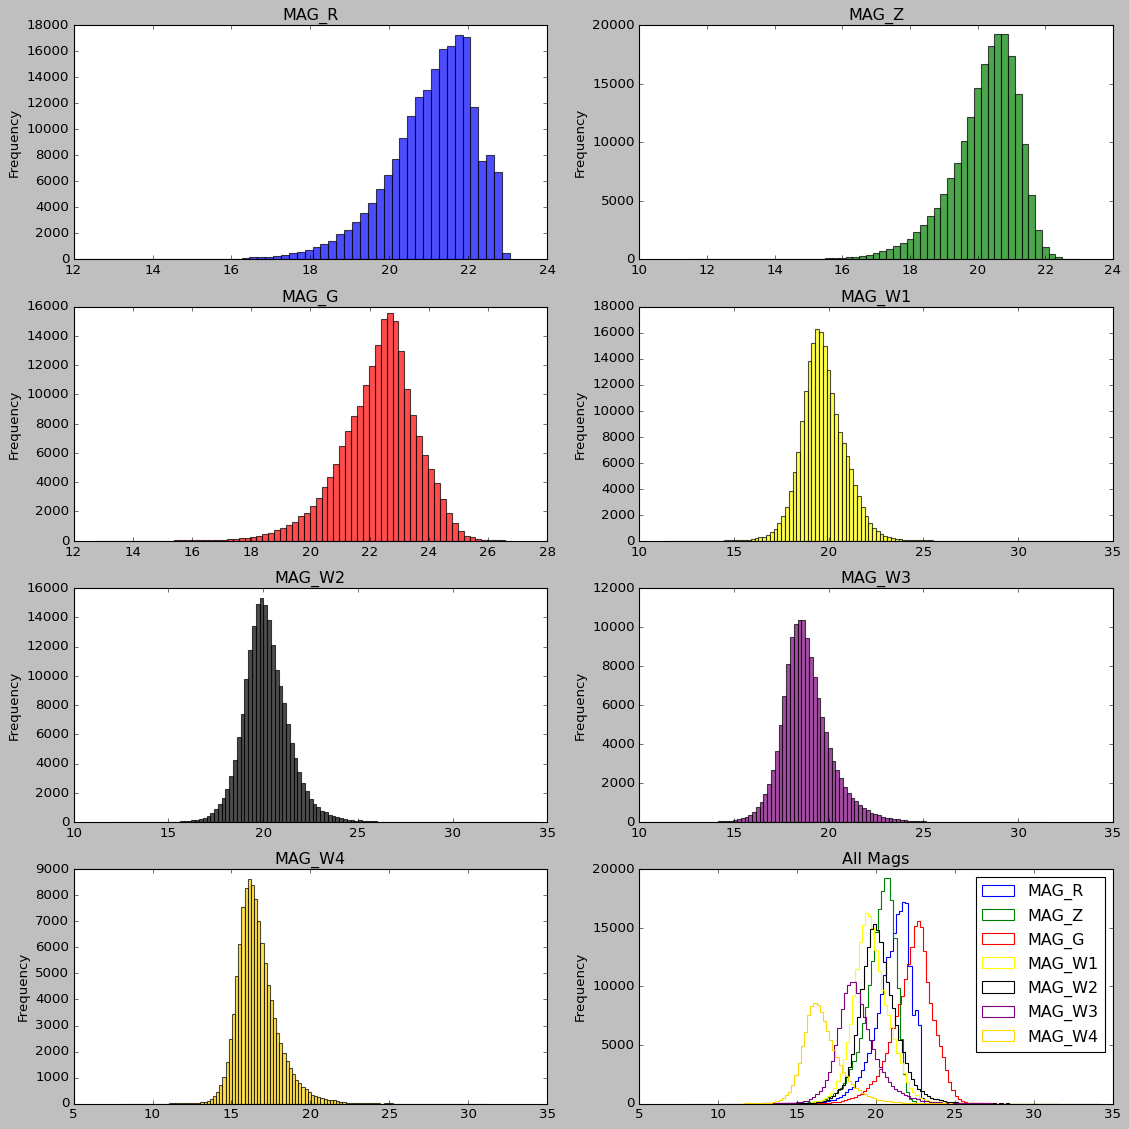

In [ ]:
data = cat_table
### MAG PLOTS
BANDS = ["R","Z", "G", "W1", "W2", "W3", "W4"]
mags = ['MAG_'+band for band in BANDS]
key_list = mags 
color_list = ['blue', 'green', 'red', 'yellow', 'black', "purple", "gold"]
hor = 2
ver = 4

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


for v in range(ver):
    for h in range(hor):
        if v==(ver-1):
            ax = fig.add_subplot(gs[v, 0])
            bins = binarange(data.field(key_list[i]), binsize)
            ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
            ax.set_title(key_list[i])
            
            ax = fig.add_subplot(gs[v, 1])
            for c, key in enumerate(key_list):
                bins = binarange(data.field(key), binsize)
                ax = df[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break
            i+=1
            
        
        
        mags = ['MAG_'+band for band in BANDS]
        
        ax = fig.add_subplot(gs[v, h])
        bins = binarange(data.field(key_list[i]), binsize)
        ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

# Select Pandas Dataframe mag_g < 22 

In [ ]:
rslt_df = df[df['MAG_G'] < 22]
print(rslt_df)

                ra        dec      MAG_R  ...      zmax  z_spec  training
2       218.976383  34.626466  18.890739  ...  0.230530   0.206       1.0
3       218.924620  34.625596  20.606371  ...  0.588631 -99.000       0.0
4       219.104225  34.625848  20.372391  ...  0.257679 -99.000       0.0
9       218.854058  34.629541  20.439299  ...  0.273898 -99.000       0.0
14      219.119427  34.632669  17.951214  ...  0.197469   0.186       1.0
...            ...        ...        ...  ...       ...     ...       ...
203456  221.320375  35.019494  20.778296  ...  0.410332 -99.000       0.0
203457  221.314180  35.020159  19.881739  ...  0.244966 -99.000       0.0
203461  221.138374  35.021188  20.347160  ...  0.183073 -99.000       0.0
203464  221.325672  35.022265  20.660891  ...  0.591026 -99.000       0.0
203468  221.372059  35.024040  20.499336  ...  0.383592 -99.000       0.0

[72487 rows x 22 columns]


# Mounting your google drive

To mount your google drive:
click in showed link and set your account google get token 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Saving New Catalog with Pandas Dataframe in csv 


(Google Drive)

In [ ]:
rslt_df.to_csv('/content/drive/MyDrive/LegacyCatalog.csv', index=False)


# Loading New Catalog with Pandas Dataframe in csv 

In [ ]:
rslt_df = pd.read_csv('/content/drive/MyDrive/LegacyCatalog.csv') 


# Calculating the signal to noise ratio

In [ ]:
SNR = 1 / rslt_df["MAGErr_G"].values
Isnr = np.where(SNR > 5)
print(len(Isnr))
print(len(SNR))
print(rslt_df["MAGErr_G"].values)
print(SNR)

1
72487
[0.01148254 0.04327033 0.02521365 ... 0.02133251 0.03973555 0.03121092]
[87.08873418 23.11052154 39.66105154 ... 46.87680546 25.16638238
 32.04006819]


# Fitting with Seaborn diagram color r-i (axis x) and g-r (axis y) 


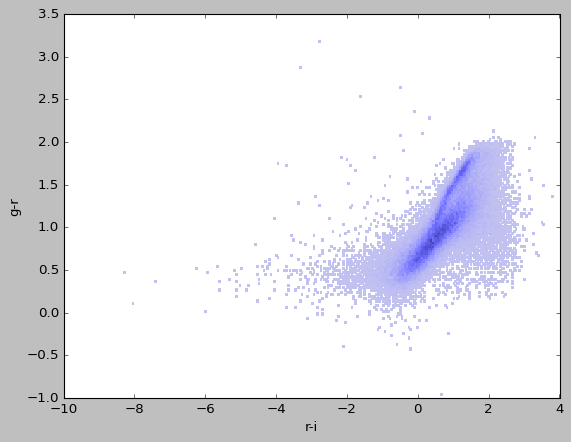

In [ ]:
x = rslt_df["MAG_R"].values - rslt_df["MAG_W1"].values
y = rslt_df["MAG_G"].values - rslt_df["MAG_R"].values

d = {'r-i': x, 'g-r': y} # dictionary 
dfplot = pd.DataFrame(data=d) # dictionary to dataframe
# print(dfplot)
# seaborn.scatterplot(data=dfplot, x="r-i", y="g-r")
seaborn.histplot(data=dfplot, x="r-i", y="g-r")

# Plot with seaborn a histogram of the redshifts and save in your google drive

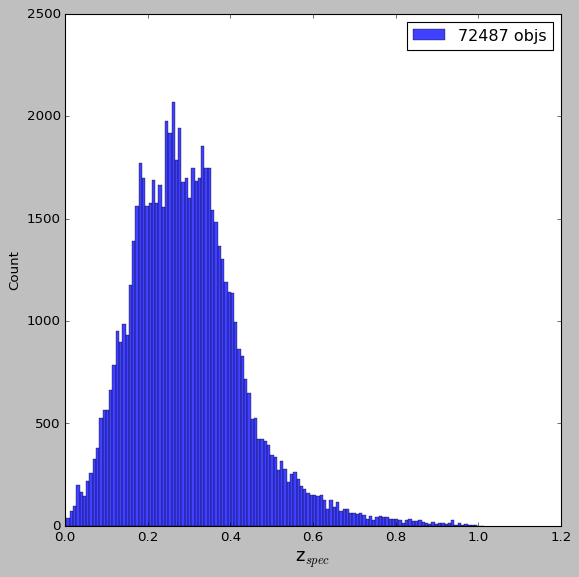

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = seaborn.histplot(data=rslt_df, x="z", label=str(rslt_df.shape[0]) + ' objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()
plt.savefig('/content/drive/MyDrive/PlotZ_Legacy.png')


In [ ]:
print("######## List files in local google colab:")
# !ls 
print("******** List files in your google drive:")
# !ls drive/MyDrive/ 


######## List files in local google colab:
******** List files in your google drive:
